Data consists of various GLD (gold) prices for several days in the period of 10 years [Date- MM/DD/YYYY].

SPX - The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States. GLD - SPDR Gold Shares is part of the SPDR family of exchange-traded funds (ETF) managed and marketed by State Street Global Advisors. USO - The United States Oil Fund ® LP (USO) is an exchange-traded security whose shares may be purchased and sold on the NYSE Arca. SLV - The iShares Silver Trust (SLV) is an exchange traded fund (ETF) that tracks the price performance of the underlying holdings in the LMBA Silver Price. EUR/USD - The Currency Pair EUR/USD is the shortened term for the euro against U.S. dollar pair, or cross for the currencies of the European Union (EU) and the United States (USD). The value of the EUR/USD pair is quoted as 1 euro per x U.S. dollars. For example, if the pair is trading at 1.50, it means it takes 1.5 U.S. dollars to buy 1 euro.

# **1. Conexion Drive**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/Kaggle/'

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

# **1. Conexion Drive**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/Kaggle/'

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

# **2. Lectura de datos**

In [4]:
df = pd.read_csv(path+'gld_price_data.csv')

In [5]:
df.head(3)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492


In [7]:
df.head().style.hide_index()

Date,SPX,GLD,USO,SLV,EUR/USD
1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099


In [8]:
df.head(10).style.background_gradient(cmap='Reds')

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


# **3. Data Wrangling**

In [11]:
df.shape

(2290, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [15]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# **4. EDA**

In [16]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [19]:
df.describe().T.style.background_gradient(cmap = 'Blues')

,count,mean,std,min,25%,50%,75%,max
SPX,2290.000000,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.000000,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.000000,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.000000,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.000000,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


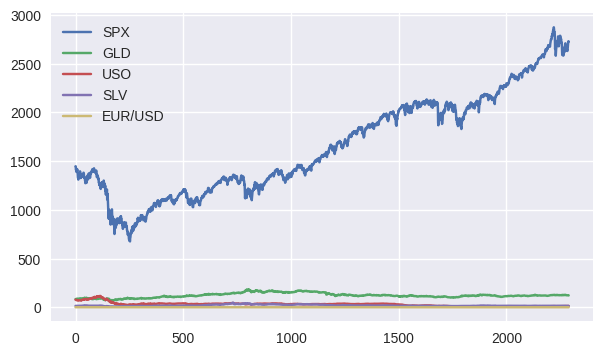

In [18]:
plt.rcParams['figure.figsize'] = [7, 4]#resize the plot
#plt.figure(figsize = (12, 8))

df.plot()
plt.show()

we will not use the colum of date becouse our data does not depend on it. so we will deal with the other missing values.

In [21]:
data = df.drop(['Date'], axis=1)

In [22]:
data.duplicated().sum()

0

In [23]:
data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

visualization

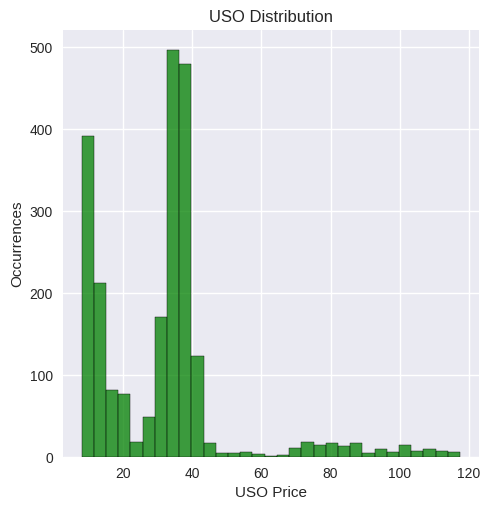

In [24]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['USO'], color='green')
plt.title('USO Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

In [25]:
q = data["USO"].quantile(0.98)
data[data["USO"] > q]
data = data[(data["USO"] < q)]

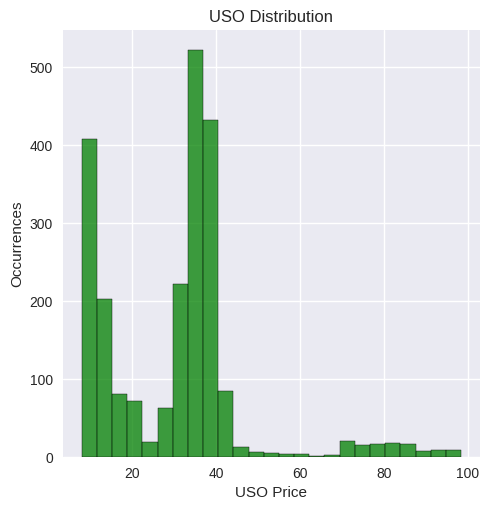

In [26]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['USO'], color='green')
plt.title('USO Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

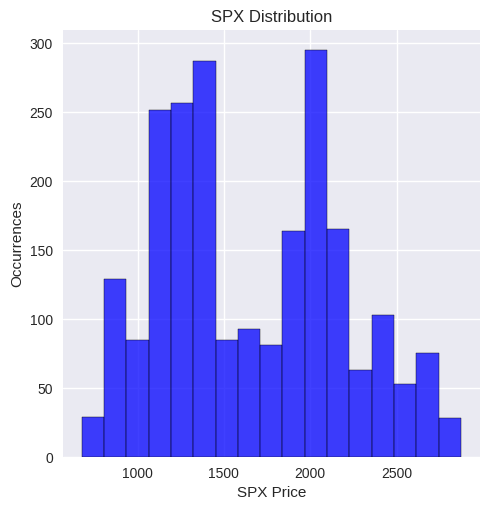

In [27]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['SPX'], color='blue')
plt.title('SPX Distribution')
plt.xlabel('SPX Price')
plt.ylabel('Occurrences')
plt.show()

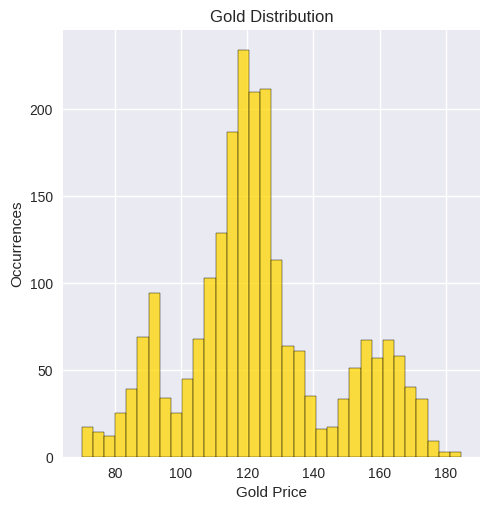

In [28]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['GLD'], color='gold')
plt.title('Gold Distribution')
plt.xlabel('Gold Price')
plt.ylabel('Occurrences')
plt.show()

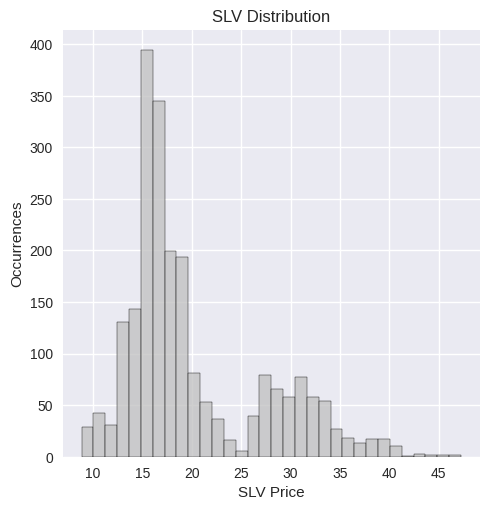

In [29]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['SLV'], color='silver')
plt.title('SLV Distribution')
plt.xlabel('SLV Price')
plt.ylabel('Occurrences')
plt.show()

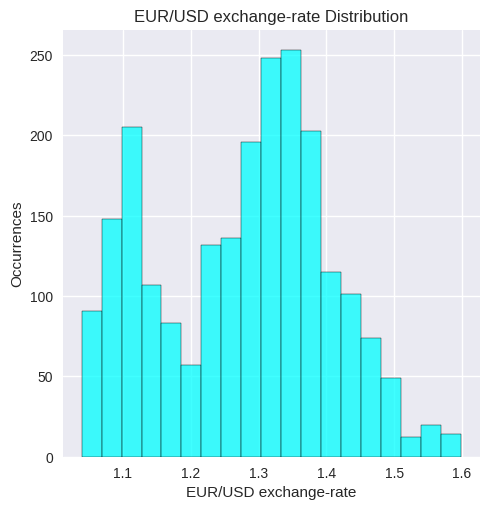

In [30]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['EUR/USD'], color='cyan')
plt.title('EUR/USD exchange-rate Distribution')
plt.xlabel('EUR/USD exchange-rate')
plt.ylabel('Occurrences')
plt.show()

Correlation

In [31]:
# Compute pairwise correlation of columns
# to identity the highly correlated features.
correlation = data.corr()

<Axes: >

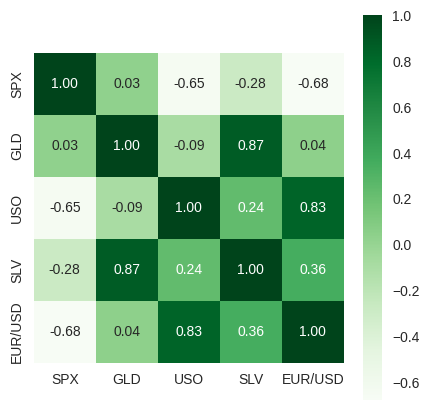

In [33]:
# Construct a heatmap to undestand the correlation
plt.figure(figsize= (5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Greens')

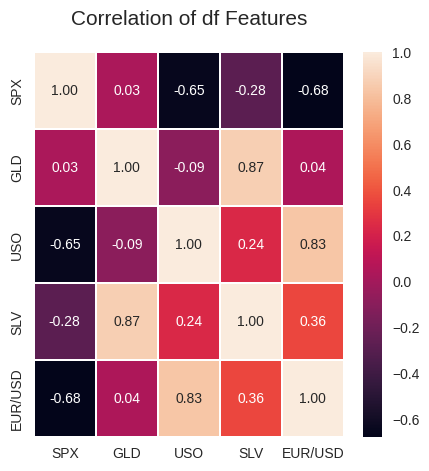

In [60]:
corr = data.corr()
plt.figure(figsize = (5,5))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)
plt.title('Correlation of df Features', y = 1.05, size=15);

In [61]:
#Lets look the correlation score
print (corr['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.874769
EUR/USD    0.040271
SPX        0.032141
USO       -0.091204
Name: GLD, dtype: float64 



In [34]:
# correlation values of Gold
print(correlation['GLD'])

SPX        0.032141
GLD        1.000000
USO       -0.091204
SLV        0.874769
EUR/USD    0.040271
Name: GLD, dtype: float64


Skewness: %f 0.3341383472692508
Kurtosis: -0.275081


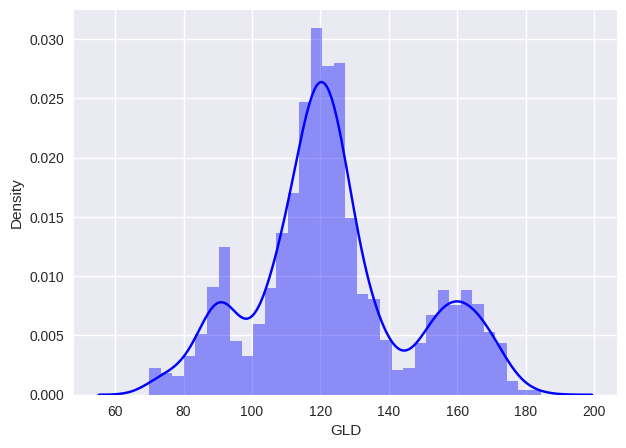

In [62]:
#Lets Check our target variable
sns.distplot(data['GLD'], color = 'blue')
print('Skewness: %f', df['GLD'].skew())
print("Kurtosis: %f" % df['GLD'].kurt())

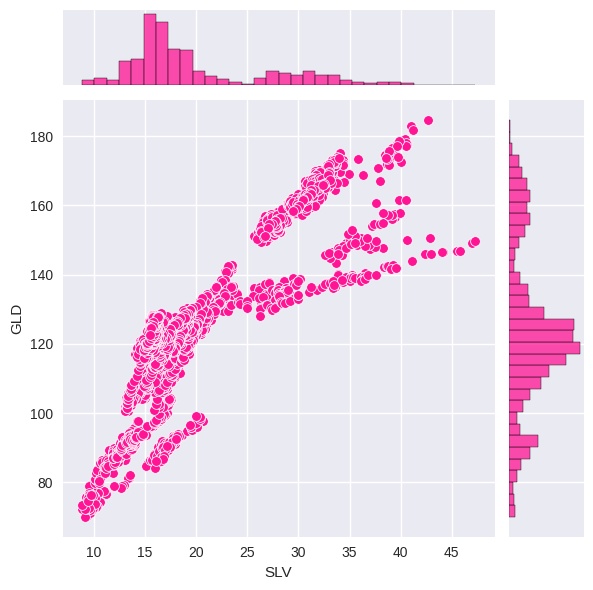

In [63]:
#Now we check the relation with GLD variable
sns.jointplot(x =data['SLV'], y = data['GLD'], color = 'deeppink')

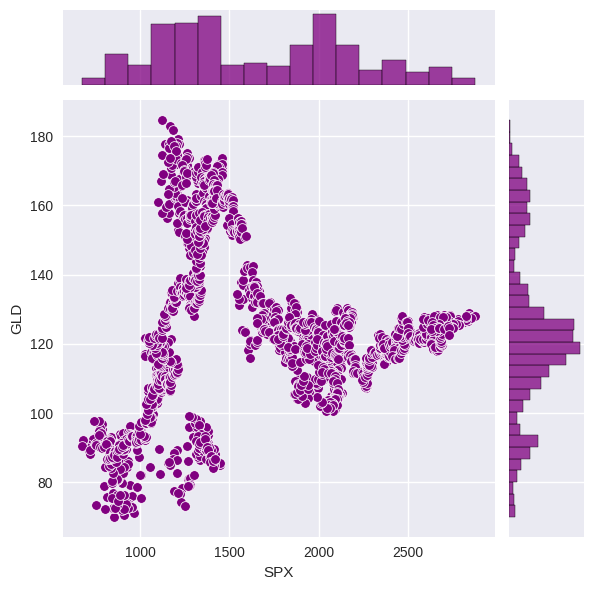

In [64]:
#Now we check the relation with GLD variable
sns.jointplot(x =data['SPX'], y = data['GLD'], color = 'purple')

# **6. Modelado**

## Train-Test Split

In [35]:
# discard the gold and use the rest values as features
X = data.drop(['GLD'], axis=1)

# use the gold as the target
Y = data['GLD']

In [36]:
print(X.shape,Y.shape)

(2244, 4) (2244,)


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)

## Model Creation/Evaluation

Applying regression models
* Random Forest Regression

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
regressor = RandomForestRegressor(n_estimators=100)

In [44]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [45]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [46]:
from sklearn import metrics

In [47]:
# R Squared error
error_score = metrics.r2_score(Y_test, test_data_prediction) # coefficient of determination, regression score function.
print('R squared error : ', error_score)

R squared error :  0.9887015171874263


In [67]:
#Now Check the error for regression
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(Y_test,test_data_prediction))
print('MSE :'," ", metrics.mean_squared_error(Y_test,test_data_prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(Y_test,test_data_prediction)))

MAE :   1.2036660294877541
MSE :   5.395158793280775
RMAE :   2.3227481123188487


In [68]:
#Now Lets Check the Training and Test set Accuracy
accuracy_train = regressor.score(X_train, Y_train)
accuracy_test = regressor.score(X_test, Y_test)
print(accuracy_train)
print(accuracy_test)

0.9983803800453339
0.9887015171874263


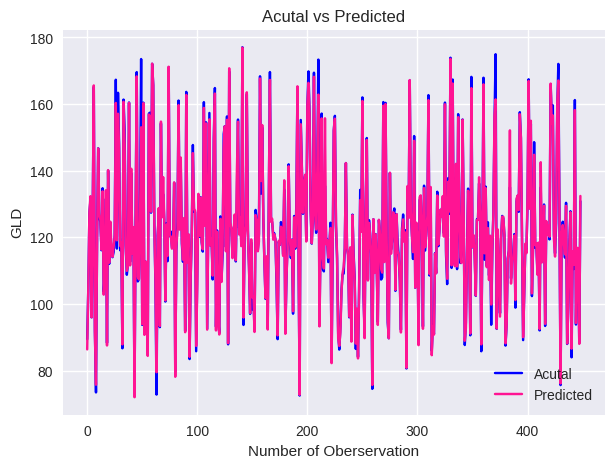

In [69]:
#Visualising the Accuracy of Predicted result
plt.plot(Y_test, color = 'blue', label = 'Acutal')
plt.plot(test_data_prediction, color = 'deeppink', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()

Compare the Actual Values and Predicted Values in a Plot

In [48]:
Y_test = np.array(Y_test)

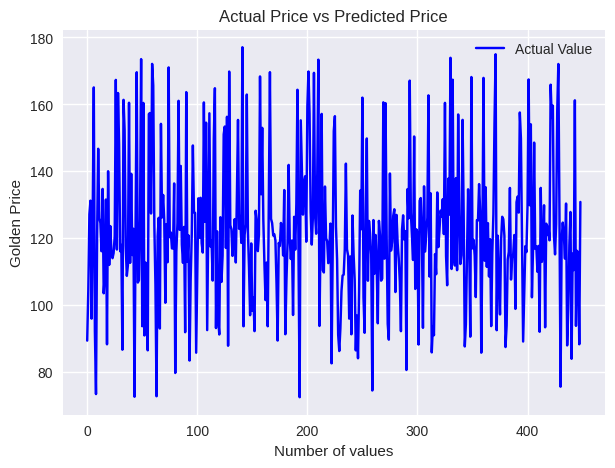

In [50]:
plt.rcParams['figure.figsize'] = [7, 5]#resize the plot
plt.plot(Y_test, color='blue', label='Actual Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

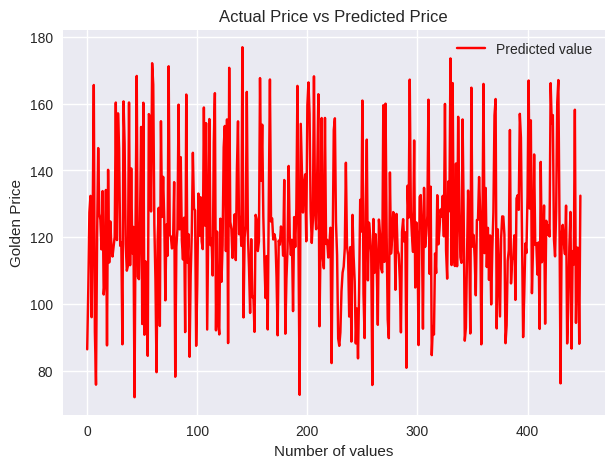

In [51]:
plt.plot(test_data_prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

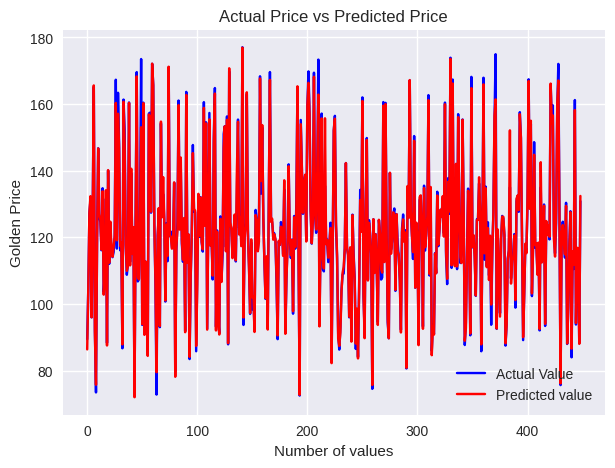

In [52]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

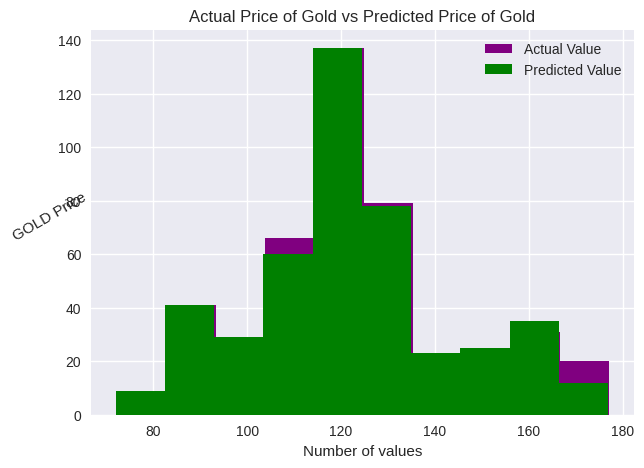

In [54]:
plt.figure(figsize = (7,5))
plt.hist(Y_test, color='purple', label = 'Actual Value')
plt.hist(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price of Gold vs Predicted Price of Gold')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price', rotation=30)
plt.legend()
plt.show()

Building a System to use the model

In [55]:
def convertor(user_input):

    for i in range(len(user_input)):
        user_input[i] = float(user_input[i])

    print("values = ", tuple(user_input))
    return tuple(user_input)

In [57]:

print("how many values will you calculate: (NOTE: Press q to break)")
count = int(input())

while (count != 0):

    count = count-1
    input_string = input()
    user_input = input_string.split()
    if(input_string.lower() == "q"):
        print("END")
        break
    input_data = convertor(user_input)
    # changing input_data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)#search

    # implementing the trained model
    prediction = regressor.predict(input_data_reshaped)
    print(prediction)

    print('The cost of the gold is:', prediction[0])


how many values will you calculate: (NOTE: Press q to break)
3
q
END
